## 노트북 : 16bagging

http://naver.me/GRAhMrdm

## 베깅BAGGING기반 분류기
<img src='bagging.png'>
* 연주하기 어려운 바이올린 연주곡을
  두세명의 초급 바이올린 연주가가 나눠 연주함으로써
  한 명의 중급 연주자가 연주하느 것보다 더 나을 수 있음

* boostrap + aggregation
+ 한 가지 분류 모델을 여러 개 만들어서
  서로 다른 학습 데이터로 학습시킨 후 (bootstrap)
 + 동일한 테스트 데이터에 대한 서로 다른 예측값들을
 + 투표로 통해(aggregating) 가장 높은 예측값으로 최종 결론을 내리는 기법
 + 배깅의 대표적인 알고리즘이 랜덤 포레스트.
 
 * sklearn에서 BaggingClassifier를 제공

## bootstrap
* 배깅은 하나의 알고리즘을 사용하지만 학습 데이터셋을
   랜덤하게 추출하여 모델(분류기)를 각각 다르게 학습시키는 방법
* 학습데이터를 추출할 떄 **중복**을 허용하는 것
* 데이터에 편향성이 생겨 모델이 과적합되는 것을 막을 수 있음.

## 랜덤 포레스트
* 앙상블 알고리즘 중 베깅을 적용해서 만든 머신러닝 알고리즘
<img src='randomforest.png'>

In [14]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

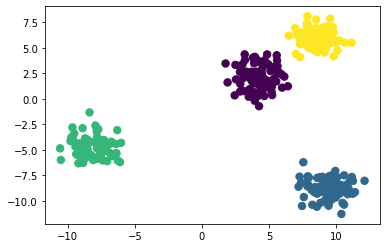

In [15]:
# 테스트용 데이터 생성 및 시각화
X, y = make_blobs(n_samples=350, centers=4,
                 random_state=211111745, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [23]:
# 데이터 분할

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=2111111715)

In [24]:
# Baggingclassifier(분류기, 옵션)
# n_estimators : 베깅시 사용할 분류기 수 지정
# max_samples : 베깅시 사용할 표본의 갯수
# boostrap : 표본 추출 시 중복 허용여부 지정
bgcf = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators=300, max_samples=175, bootstrap=True)

In [26]:
bgcf.fit(Xtrain, ytrain)
pred = bgcf.predict(Xtest)
print( bgcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

1.0 1.0


In [28]:
lr = bgcf

In [29]:
# 분류기 1개 수행 시 결과
lr = LogisticRegression(max_iter=1000)
lr.fit(Xtrain, ytrain)
pred = lr.predict(Xtest)
print( lr.score(Xtrain, ytrain),
      accuracy_score(ytest,pred))

1.0 1.0


In [37]:
# 시각화도 한번 해봅시다.
import mldlpy3


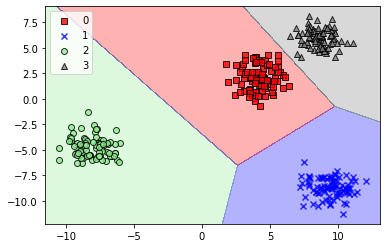

In [39]:
mldlpy3.plot_decision_regions(X, y, lr)

# 로지스틱 회귀는 좀 그렇네요. 성능이 그렇게 좋은 것 같지도 않고.

In [40]:
# kneighbor 분류기 적용

bgcf = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators=300, max_samples=175, bootstrap=True)
bgcf.fit(Xtrain, ytrain)
pred = bgcf.predict(Xtest)
print( bgcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

1.0 1.0
